<a href="https://colab.research.google.com/github/harperd/machine-learning/blob/master/notebooks/multivariate-linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Linear Regression

Predict the price a house will sell for given the size of the house in sqft and the number of bedrooms.

In [0]:
# NumPy adds support for large, multi-dimensional arrays and matrices, along with a large collection 
# of high-level mathematical functions to operate on these arrays.
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics 
# extension NumPy. It provides an object-oriented API for embedding plots into applications using 
# general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
import matplotlib.pyplot as plt

# SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source 
# software for mathematics, science, and engineering
from scipy import stats

# Allow saving our graphs in the notebook
%matplotlib inline

# Pandas is a software library for data manipulation and analysis. In particular, it offers data 
# structures and operations for manipulating numerical tables and time series.
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

In [0]:
df_raw = pd.read_csv(
    'https://raw.githubusercontent.com/harperd/machine-learning/master/data/ex1data2.csv',
    header = None,
    names=[ 'Size', 'Bedrooms', 'Price' ])
%time print(f'{len(df_raw.index):,} rows read.')

47 rows read.
CPU times: user 125 µs, sys: 24 µs, total: 149 µs
Wall time: 155 µs


In [0]:
df_raw.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Notice that the scale of the values for each variable is vastly different. A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. If we were to run our regression algorithm on this data as-is, the "size" variable would be weighted too heavily and would end up dwarfing any contributions from the "number of bedrooms" feature. To fix this, we can normlize our data by Z-Scoring.

In [0]:
df_norm = pd.DataFrame(data = stats.zscore(df_raw), columns = df_raw.columns)
df_norm.head()

,Size,Bedrooms,Price
0,0.131415,-0.226093,0.480890
1,-0.509641,-0.226093,-0.084983
2,0.507909,-0.226093,0.231097
3,-0.743677,-1.554392,-0.876398
4,1.271071,1.102205,1.612637


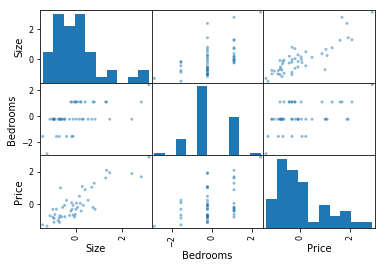

In [0]:
pd.plotting.scatter_matrix(df_norm)
plt.show()

Looking at the Scatter Matrix we see a high correlation between price and size of house but not between the number of bedrooms and price. This tells us that the number of bedrooms will not have a significant effect on price.

In [0]:
# Append a bias column to the beginning
# of the DataFrame. This will be used when computing
# the hypothesis using matrix multiplication.
if 'Bias' not in df_norm:
  # Insert new column at index 0, with name Bias and
  # a value of all ones.
  df_norm.insert(0, 'Bias', 1)
  
df_norm.head()

,Bias,Size,Bedrooms,Price
0,1,0.131415,-0.226093,0.480890
1,1,-0.509641,-0.226093,-0.084983
2,1,0.507909,-0.226093,0.231097
3,1,-0.743677,-1.554392,-0.876398
4,1,1.271071,1.102205,1.612637


Create matrices for our training set (X), our labels (y) and initial theta values (0, 0). These matrices will be used for our calculations.

In [0]:
# Set X (independent/training variable) 
# and y (dependent/target variable)
cols = df_norm.shape[1]

# Get all rows and the first three columns of our DataFrame and assign to X.
X = df_norm.iloc[:, 0:cols - 1]

# Get the last column of our DataFrame and assign to y.
y = df_norm.iloc[:, cols - 1:cols]

# Convert from DataFrames to numpy matrices for easier
# calculations.
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([ 0, 0, 0 ]))

X.shape, theta.shape, y.shape

((47, 3), (1, 3), (47, 1))

In [0]:
 def compute_cost(X, y, theta):
  # h(x)
  # Calculate predictions, h(x), with current theta values.
  # Here we are doing matrix multiplication as 
  # X multiplied by theta transposed.
  predictions = X * theta.T

  # h(x) - y
  # Get the error which tells us how far off our
  # preditions are from the dependent variables.
  error = predictions - y
  
  # sum( (h(x) - y)^2 )
  # Get the sum square error.
  sum_square_error = np.sum(np.square(error))
  
  # 1/2m * sum( (h(x) - y)^2 )
  # Compute the cost.
  m = len(y)
  cost = sum_square_error / ( 2 * m )
  
  return cost

In [0]:
def gradient_descent(X, y, theta, alpha):
    m = y.shape[0]
    cost_history = []
    theta_history = []
    cost = 0
    iterations = 1
    converged = False
    
    # Keep calculating new theta values until we have converged
    # at the minimum.
    while(not converged):
      # Calculate predictions, h(x), with current theta values.
      predictions = X * theta.T
      
      # Get the error which tells us how far off we are from the
      # actual/dependent variables.
      error = predictions - y
      
      # Calculate the gradient
      gradient = ( error.T * X ) / m 
      
      # Get our new theta values
      theta = theta - ( alpha * gradient )
      
      # Compute the cost: J(theta0, theta1, theta2)
      cost = compute_cost(X, y, theta)

      # Check for convergence.
      # If the previous cost is the same as the current cost then
      # we have converged to the minimum.
      if (iterations > 1 and cost_history[-1] == cost):
        converged = True
      else:
        # Increase the number of iterations
        iterations = iterations + 1

      if(not converged):
        # Track our cost history. We will graph this to see how cost
        # decreases with the number of iterations.
        cost_history.append(cost)
        theta_history.append(np.squeeze(np.asarray(theta)))
      
    return theta_history, cost_history, iterations

thetas, costs, iterations = gradient_descent(X, y, theta, alpha = 0.01)

print(f'Optimal theta values..: {thetas[-1]}')
print(f'Minimum Cost..........: {costs[-1]}')
print(f'Iterations............: {iterations:,}')

Optimal theta values..: [-8.32194833e-17  8.84765871e-01 -5.31787029e-02]
Minimum Cost..........: 0.13352749098554886
Iterations............: 3,449


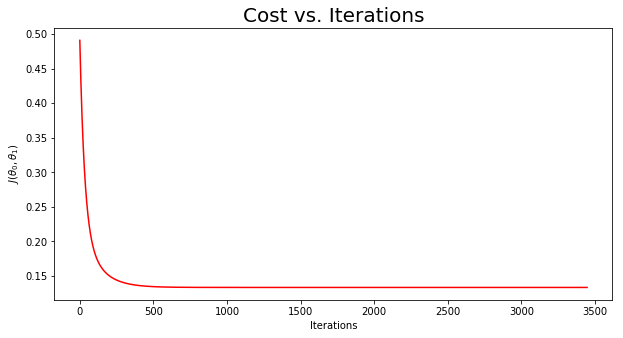

In [0]:
def plot_cost(cost_history):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(cost_history, 'r')
  ax.set_xlabel('Iterations')
  ax.set_ylabel(r'$J(\theta_0,\theta_1)$')
  ax.set_title('Cost vs. Iterations', fontsize=20)
  
plot_cost(costs)

The cost, or error of the solution, dropped with each sucessive iteration until it bottomed out. This is exactly what we would expect to happen. It looks like our algorithm worked.

In [0]:
def zscore(scalar, mean, std):
  return ( scalar - mean) / std

def zscore_inv(scalar, mean, std):
  return ( scalar * std ) + mean

def predict(size, bedrooms, theta):
  size_z = zscore(size, df_raw.mean().Size, df_raw.std().Size)
  bedrooms_z = zscore(bedrooms, df_raw.mean().Bedrooms, df_raw.std().Bedrooms)
  x = np.array([1, size_z, bedrooms_z])
  prediction = np.dot(np.array(theta).transpose(), x)
  prediction_inv = zscore_inv(prediction, df_raw.mean().Price, df_raw.std().Price)
  return int(round(prediction_inv, 0))

def make_prediction(size, bedrooms, theta):
  prediction = predict(size, bedrooms, theta)
  print(f'For a {size:,} sqft house with {bedrooms} bedrooms, we predict a price of ${prediction:,}.')
        
make_prediction(size = 4000, bedrooms = 5, theta = thetas[-1])
make_prediction(size = 2000, bedrooms = 3, theta = thetas[-1])
make_prediction(size = 1500, bedrooms = 2, theta = thetas[-1])

For a 4,000 sqft house with 5 bedrooms, we predict a price of $602,751.
For a 2,000 sqft house with 3 bedrooms, we predict a price of $341,805.
For a 1,500 sqft house with 2 bedrooms, we predict a price of $280,938.
